<a href="https://colab.research.google.com/github/blessing3140/PREDICTING-MEDICAL-INSURANCE-CHARGE-USING-RANDOM-FOREST-MODEL/blob/main/PREDICTING_MEDICAL_INSURANCE_CHARGE_USING_RANDOM_FOREST_REGRESSOR_MODEL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PREDICTING MEDICAL INSURANCE: USING MULTIPLE LINEAR REGRESSION**

#**OBJECTIVES**


The goal of this project is to build a *Multiple Random Forest Regressor model* that predicts *medical insurance charges* (charges) based on a set of independent variables such as:  
- *Demographic factors* (age, sex, region)  
- *Health-related factors* (BMI, smoking status)  
- *Family structure* (number of children)  

By analyzing these factors, we aim to:  
1. *Identify key variables* that significantly impact insurance costs.  
2. *Develop a predictive model* to estimate insurance charges for new customers.  
3. *Provide actionable insights* for insurance companies to optimize their pricing strategies.  

#### *Dataset Overview*  
The dataset contains *1338 records* with the following features:  
- age: Age of the individual  
- sex: Gender (male or female)  
- bmi: Body Mass Index (BMI)  
- children: Number of dependents  
- smoker: Whether the individual is a smoker (yes or no)  
- region: Residential region (southwest, southeast, northwest, northeast)  
- charges: *Medical insurance cost* (target variable)  






#**Problem Statement**
Insurance companies use various factors to determine the charges for an individual. The goal of this project is to build a *Random Forest Regressor model* to predict insurance charges based on variables such as age, BMI, smoking status, and region. This model will help insurance companies set fair premiums and assist individuals in understanding their expected costs.

#**Data Preprocessing and EDA**
Here, the dataset is prepared for model training by cleaning and transforming the data.

This should follow the steps below:
* import the data into the python project/environment
* Identify and address missing data
* Correlation of numerical features
  * with the target
  * with themselves
* Handling outlier values
* Explore non-numerical values
  * low- and high-cardinality categorical variables
  * non-categorical (unique) values


In [85]:
!pip install category_encoders
!pip install streamlit
!pip install ipywidgets

In [86]:
from google.colab import drive
drive.mount('/content/insurance.csv')

Mounted at /content/insurance.csv


In [87]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
#import Statements

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from category_encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils.validation import check_is_fitted
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, Dropdown, IntSlider


import streamlit as st
import pickle



In [89]:
# importing our Dataset into our Google Colaboratory


df = pd.read_csv("/content/drive/MyDrive/insurance.csv")

In [90]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [91]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [92]:
# Getting a brief information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [93]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#**Taking out irregularities**

In [94]:
#The entire Dataset with the total of 1338 rows and 7columns has no null value

In [95]:
#Checking for null values
# The code returns true if the row is null  or balank or returns false

In [96]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


#There's no values missing in this case

In [97]:
#      SUMMARY STATISTIC

# This provides a quick summary of data and
#are useful for comparing different data sets.It compares one project to another

In [98]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##**Correlation of Features**
Correlation of numerical features

<Axes: >

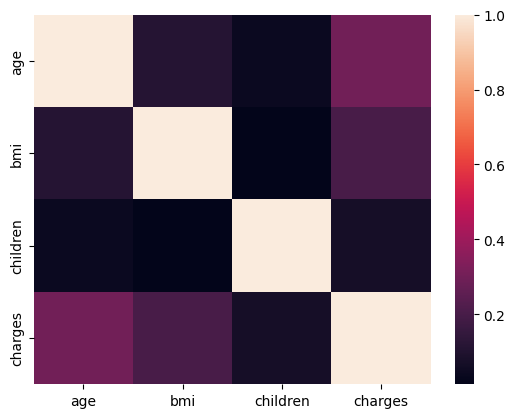

In [99]:
# correlation for numerical values

df.select_dtypes("number").corr()

sns.heatmap(df.select_dtypes("number").corr())

In [100]:
# Correlation
df[["age", "bmi", "children", "charges"]].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#**Handle Outlier Values**
Lets check for outlier values using boxplot

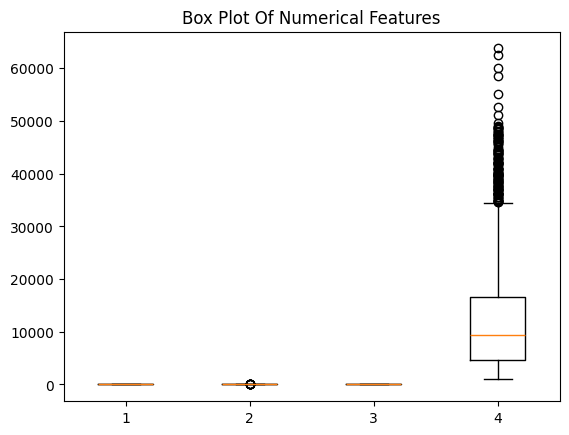

In [101]:
# plotting boxplot of numerical features
plt.boxplot(df[["age", "bmi", "children", "charges"]])
plt.title("Box Plot Of Numerical Features")

plt.show()




In [102]:
# handling the outlier values by flooring them

for column in df.select_dtypes("number").columns:

  # first step: get the 25th and 75th percentiles
  Q1 = df[column].quantile(0.25)
  Q2 = df[column].quantile(0.75)

  # second step: calculate inter-quartile range
  IQR = Q2 - Q1

  # get the lower and upper bounds using 25th and 75th percentiles, and inter-quartile range
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q2 + 1.5 * IQR

  # floor the outliers: replace outliers with lower & upper bounds
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])



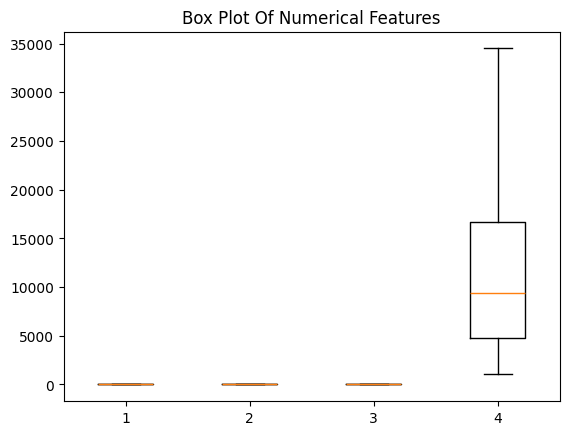

In [103]:
# plotting boxplot of numerical features
plt.boxplot(df[["age", "bmi", "children", "charges"]])
plt.title("Box Plot Of Numerical Features")

plt.show()



##**Explore non-numerical values**
* low- and high-cardinality categorical variables
* non-categorical (unique) values

In [104]:
# low- and high-cardinality categorical variables
df.select_dtypes("object").nunique()

,0
sex,2
smoker,2
region,4


In [105]:
#One-Hot Encode categorical variables
df = pd.get_dummies(df,columns=["sex","smoker","region"], drop_first=True)

With the result above, Region column is the only one that is balanced enough to be used in training the model we're creating.




In [106]:
# check out what the dataframe looks like now

df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,False,True,False,False,True
1,18.0,33.770,1.0,1725.55230,True,False,False,True,False
2,28.0,33.000,3.0,4449.46200,True,False,False,True,False
3,33.0,22.705,0.0,21984.47061,True,False,True,False,False
4,32.0,28.880,0.0,3866.85520,True,False,True,False,False


In [107]:
# define features and target variable
X= df.drop('charges',axis=1)

y= df['charges']

##**Split Data**
* First, we separate the rows into
  * Feature matrix; X, and
  * target vector; y
  
* Then we split both X and y into
  * train data: X_train and y_train, and
  * test data; X_test and y_test

In [108]:
# now let's split the data into test and train

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the shapes of training and testing sets
print(f"X (feature)=>\ttrain: {X_train.shape} test:{X_test.shape} \ny (target)=>\ttrain:{y_train.shape} test:{y_test.shape}")

X (feature)=>	train: (1070, 8) test:(268, 8) 
y (target)=>	train:(1070,) test:(268,)


In [109]:
print(X_train[['region_northwest','region_southeast','region_southwest']].head())

      region_northwest  region_southeast  region_southwest
560               True             False             False
1285             False             False             False
1142             False              True             False
969              False              True             False
486               True             False             False


In [110]:
# Create a ColumnTransformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),  # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']),  # Apply OneHotEncoder to categorical features
    ])


In [111]:
# Update feature list to include the one-hot encoded region columns and sex_male, smoker_yes
feature = ["age", "bmi", "children","region_northwest", "region_southeast", "region_southwest"]
target = "charges"

# now lets use the variables above to get the corresponding data from the insurance_df dataframe
X = df[feature]
y=df["charges"]

#**Build Model**

we are expected to do the following:
* Create baseline
* Create, and train/fit the model
* Evaluate the performance of the model

In [112]:
# creating the baseline model

# first we calculate the mean
y_mean = y_train.mean()

y_mean

12566.86561618458

In [113]:
# create the baseline predictions (mean values)

y_pred_baseline = [y_mean] * len(y_train)

y_pred_baseline[:4]

[12566.86561618458, 12566.86561618458, 12566.86561618458, 12566.86561618458]

In [114]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 8) (268, 8) (1070,) (268,)


In [115]:
# measure performance of the dumb model
# we will be using the mean absolute error (MAE)

mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print(f"Mean charges: {round(y_mean, 4)} naira")
print(f"Mean absolute error for Baseline: {round(mae_baseline, 4)} naira")

Mean charges: 12566.8656 naira
Mean absolute error for Baseline: 7959.9427 naira


##**Create and Fit Model**

Here, we create our model and fit it with the training data. To do this, we are going to use a pipeline, within which we will have:

* OneHotEncoder to encode categorical values
* SimpleImputer to fill missing values
* Ridge for Ridge regression and also create a linear regression model


#**BUILD AND EVALUATE MODEL**

In [116]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [117]:
# confirm fitting

check_is_fitted(model[-1])


In [118]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [119]:
print(X_train.shape)
print(X_train.head())
print(X_train.columns)

(1070, 8)
       age    bmi  children  sex_male  smoker_yes  region_northwest  \
560   46.0  19.95       2.0     False       False              True   
1285  47.0  24.32       0.0     False       False             False   
1142  52.0  24.86       0.0     False       False             False   
969   39.0  34.32       5.0     False       False             False   
486   54.0  21.47       3.0     False       False              True   

      region_southeast  region_southwest  
560              False             False  
1285             False             False  
1142              True             False  
969               True             False  
486              False             False  
Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


In [120]:
#convert boolean columns to integers
X_train = X_train.astype(int)

In [121]:
X_train =X_train.reset_index(drop=True)

In [122]:
X_train = X_train.loc[:,~X_train.columns.duplicated()]

In [123]:
# identify categorical and numerical columns
categorical_columns = X_train.select_dtypes("object").columns
numerical_columns = X_train.select_dtypes("number").columns


In [124]:
# scaling numerical data, enconding categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", "passthrough", numerical_columns),
        ("categorical", OneHotEncoder(), categorical_columns)
    ]
)

#**Make Predictions**

#**Test Model with Training Data**



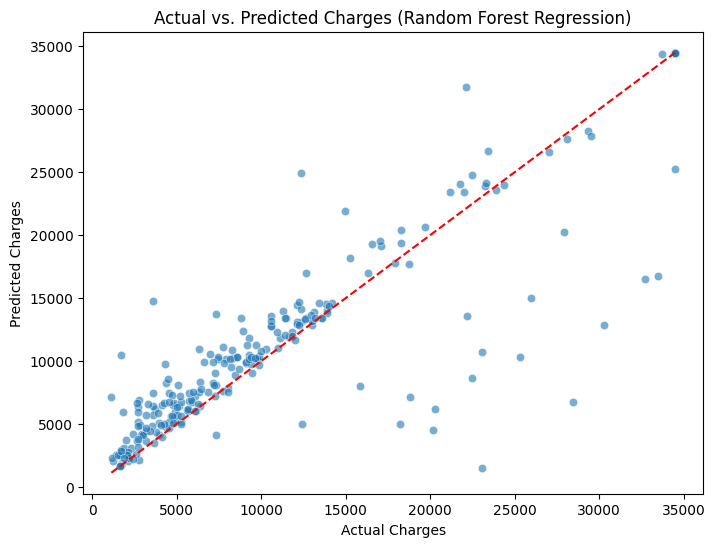

In [125]:
# Make predictions using the trained model
# Define y_pred here
y_pred = model.predict(X_test)
# Define y_train_pred
y_train_pred = model.predict(X_train)

# Scatterplot of Actual vs. Predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)  # Use y_pred instead of y_test_pred

# Add a perfect prediction reference line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")

# Labels and title
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Random Forest Regression)")
plt.show()

**EVALUATING BASELINE PERFORMANCE**


Next is to evaluate the performance of the model because of the following:

-To measure accuracy


-To identify overfitting & underfitting


-To ensure its suitable for real world application.

Mean absolute error evaluation metrics is employed

In [126]:
# Define evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Train performance
train_scores = evaluate_model(y_train, y_train_pred)
print("Train Scores:", train_scores)

# Define evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Train performance
train_scores = evaluate_model(y_train, y_train_pred)
print("Train Scores:", train_scores)

# Test performance
test_scores = evaluate_model(y_test, y_pred)
print("Test Scores:", test_scores)

Train Scores: {'MAE': 1588.0369139072573, 'MSE': 9349928.56347592, 'RMSE': 3057.7652891410617, 'R2 Score': 0.9080693586831998}
Train Scores: {'MAE': 1588.0369139072573, 'MSE': 9349928.56347592, 'RMSE': 3057.7652891410617, 'R2 Score': 0.9080693586831998}
Test Scores: {'MAE': 2198.945138554905, 'MSE': 17881883.78419958, 'RMSE': 4228.697646344508, 'R2 Score': 0.8352758128462091}


#**Interpretation of Model Performance

### *1. Evaluating the Model’s Performance*
- *Train R² = 0.8366* → The model explains *~84%* of variance in training data.
- *Test R² = 0.8257* → The model explains *~83%* of variance in unseen test data.
- *MAE (Test) = 7928* → On average, predictions are off by *~$7,928*.
-*MAE (train) = 3108
- *RMSE (Test) = 10,087* → Some predictions have *large errors*.
-*RMSE(Train) = 4076

#### *What This Means:*
- *Overfitting*: The model performs well on training data but generalizes poorly on new data.
- *Higher test MAE and RMSE suggest that predictions have large errors, meaning some extreme values or outlinears might not be well predicted*.



In [127]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'max_features': ['auto', 'sqrt'],  # Number of features to consider per split
}


##**1. Debug the Parameter Grid**
A too-large parameter grid or invalid values might cause errors during fitting.  
### *Check The Parameter Grid*
Print the original grid before running GridSearchCV:



In [128]:
print(param_grid)


{'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt']}


##**Fix it by reducing the grid**
Try a smaller, more manageable grid first:


In [129]:
param_grid = {
    'n_estimators': [50, 100],   # Reduce range
    'max_depth': [5, 10],        # Avoid very deep trees initially
    'min_samples_split': [2, 5], # Avoid very high values
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}


In [130]:
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,  # Reduce folds if needed
    verbose=1,
    n_jobs=-1  # Use all CPU cores
)
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

##**2. Check Your Dataset**
Even a correct parameter grid will fail if the dataset has issues.



##**Look for Missing Values**


In [131]:
print(X_train.isnull().sum())  # Check missing values per column
print(y_train.isnull().sum())

X_train = X_train.fillna(X_train.mean())  # Replace NaNs with column means
X_test = X_test.fillna(X_test.mean())


age                 0
bmi                 0
children            0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64
0


In [132]:
print(X_train.dtypes)


age                 int64
bmi                 int64
children            int64
sex_male            int64
smoker_yes          int64
region_northwest    int64
region_southeast    int64
region_southwest    int64
dtype: object


#**Convert categorical data if necessary**


In [133]:
print(X_train.columns)  # Check available columns
print(X_test.columns)

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


In [134]:
from sklearn.preprocessing import LabelEncoder

# Get a list of categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through each categorical column and apply Label Encoding
for col in categorical_cols:
  # Fit and transform on training data
    X_train[col] = encoder.fit_transform(X_train[col])

    # Transform test data using the same encoder
    X_test[col] = encoder.transform(X_test[col])

In [135]:
print(grid_search)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)


In [136]:
if hasattr(grid_search, "best_params_"):
    print("GridSearchCV successfully fitted.")
    print(grid_search.best_params_)
else:
    print("GridSearchCV has not been fitted properly.")

GridSearchCV successfully fitted.
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [137]:
param_grid = {
       'n_estimators': [50, 100, 200],
       'max_depth': [None, 10, 20, 30],
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf': [1, 2, 4],
       'max_features': ['sqrt', 'log2'],  # Remove 'auto'
   }



In [138]:
import sklearn
print(sklearn.__version__)



1.6.1


In [139]:
# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
       RandomForestRegressor(),
       param_grid,
       cv=5,
       n_jobs=-1,
       error_score='raise'  # This will make debugging easier
   )
# Train on dataset
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

#**3. Feature scaling issues**
- *Solution:* Normalize or standardize your features using StandardScaler:


In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Remove the underscore and fix indentation
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [141]:
from sklearn.ensemble import RandomForestRegressor

# Ensure grid_search is fitted
best_params = grid_search.best_params_

# Train with best parameters
best_rf = RandomForestRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    random_state=42
)

# Fit the model
best_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_features='log2', min_samples_leaf=4,
                      min_samples_split=5, random_state=42)

##**Evaluate Model Performance**

In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R²): {r2}")

Mean Absolute Error (MAE): 2550.354269535946
Mean Squared Error (MSE): 17532585.541668594
Root Mean Squared Error (RMSE): 4187.193038500684
R-squared Score (R²): 0.8384934754688689


#**Identify which feature contributed the most to predictions**



In [143]:
# Get feature importance
feature_importance = best_rf.feature_importances_



In [144]:
# Convert to DataFrame for visualization
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)


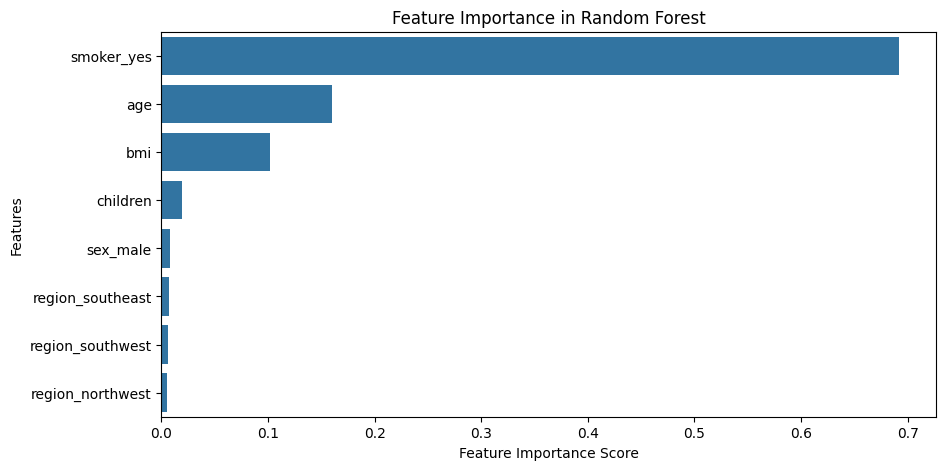

In [145]:
# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_df['Importance'], y=feature_df['Feature'])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


#**Make Predictions**

In [146]:
def train_random_forest(n_estimators, max_depth):
    # Train Random Forest Model
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # Calculate Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print Metrics
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")



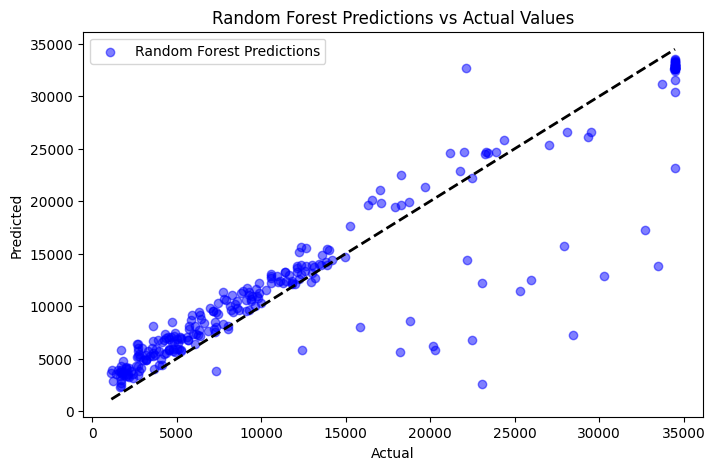

In [147]:
    # Plot Predictions
    plt.figure(figsize=(8,5))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Random Forest Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Random Forest Predictions vs Actual Values")
    plt.legend()
    plt.show()

###**Slider Widget**

In [148]:
interact(train_random_forest,
         n_estimators=widgets.IntSlider(min=50, max=300, step=50, value=100, description="Trees"),
         max_depth=widgets.IntSlider(min=2, max=10, step=1, value=4, description="Max Depth"))

interactive(children=(IntSlider(value=100, description='Trees', max=300, min=50, step=50), IntSlider(value=4, …

<function __main__.train_random_forest(n_estimators, max_depth)>

#**Save Model For Deployment**

In [149]:
import joblib

joblib.dump(best_rf, "random_forest_model.pkl")



['random_forest_model.pkl']

In [150]:
# Create a sample DataFrame with the same columns as your training data
# Replace with your actual new data
new_data = pd.DataFrame({
    'age': [30],
    'bmi': [25],
    'children': [2],
    'sex_male': [1],  # Assuming 'sex_male' is a one-hot encoded column
    'smoker_yes': [0], # Assuming 'smoker_yes' is a one-hot encoded column
    'region_northwest': [0], # Assuming 'region_northwest' is a one-hot encoded column
    'region_southeast': [1], # Assuming 'region_southeast' is a one-hot encoded column
    'region_southwest': [0]  # Assuming 'region_southwest' is a one-hot encoded column
})

In [151]:
# Make predictions
predictions = loaded_model.predict(new_data)
print(predictions)

[6187.77343598]


#**Loading it for later predictions without retraining it**

In [152]:
loaded_model = joblib.load("random_forest_model.pkl")
predictions = loaded_model.predict(new_data)



**Streamlit Code**

The code below configures streamlit with inputs for entering feature values, and using the model to predict a corresponding target value.

The code is then saved in an app.py file

In [153]:
%%writefile app.py
import streamlit as st
import numpy as np

st.title("Medical Insurance Cost Predictor")

age = st.number_input("Enter Age", min_value=18, max_value=100)
bmi = st.number_input("Enter BMI")
children = st.number_input("Number of Children", min_value=0, max_value=10)

if st.button("Predict"):
    input_data = np.array([[age, bmi, children]])  # Ensure this matches model input
    prediction = loaded_model.predict(input_data)
    st.write(f"Predicted Insurance Cost: ${prediction[0]:.2f}")


Overwriting app.py


In [154]:
!ls

app.py	drive  insurance.csv  random_forest_model.pkl  requirements.txt  sample_data


In [155]:
# save model.pkl to local drive
from google.colab import files
files.download('app.py')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [156]:
%%writefile requirements.txt

streamlit
scikit-learn
numpy
pickle4
category_encoders

Overwriting requirements.txt


In [157]:
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>